Threshold: 10
nonmaxSuppression: True
Keypoints with nonmaxSuppression: 464
Keypoints without nonmaxSuppression: 1489


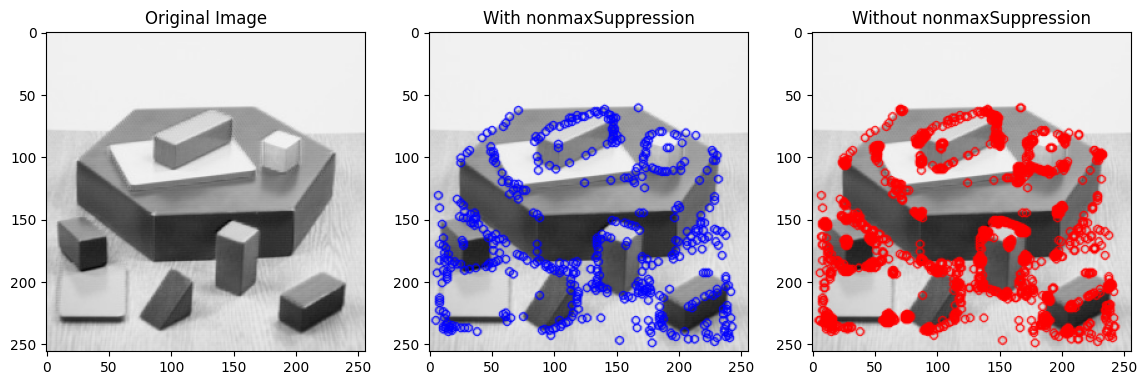

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'D:\Courses\AI work\NTI\Day4\da4.jpeg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2. FastFeatureDetector_create()

kp1 = fast.detect(gray_img, None)

img2 = cv2.drawKeypoints(gray_img, kp1, None, color=(0,0,255))

print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression: {}".format(fast.getNonmaxSuppression()))
#print("neighborhood: {}".format(fast.getType()))
print("Keypoints with nonmaxSuppression: {}".format(len(kp1)))

cv2.imwrite('fast_true.png', img2)

fast.setNonmaxSuppression(0)
kp2 = fast.detect(gray_img, None)

print("Keypoints without nonmaxSuppression: {}".format(len(kp2)))

img3 =cv2.drawKeypoints(gray_img, kp2, None, color=(255, 0,0))

cv2.imwrite('fast_false.png', img3)

plt.figure(figsize=(14, 12))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title("With nonmaxSuppression")

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.title("Without nonmaxSuppression")

plt.show()

LBP feature length: 10


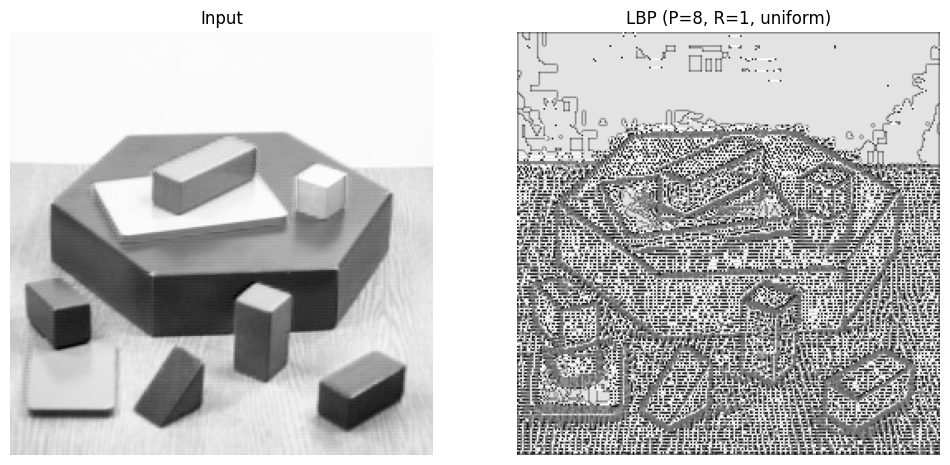

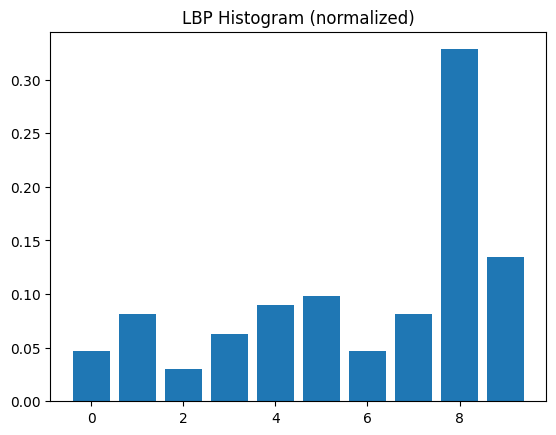

In [14]:
import cv2
import numpy as np
from skimage. feature import local_binary_pattern
import matplotlib.pyplot as plt

P =8
R = 1
METHOD = "uniform" 

img = cv2.imread(r"D:\Courses\AI work\NTI\Day4\da4.jpeg", cv2.IMREAD_GRAYSCALE)
assert img is not None, "Couldn't read image. jpg"

lbp = local_binary_pattern(img, P, R, METHOD)


n_bins = int(lbp.max() +1)
n_bins = int(lbp.max() +1)
hist,_= np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

print("LBP feature length:", len(hist))

# --- visualize (optional)
plt.figure(figsize=(12,10));

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Input")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap="gray")
plt.title(f"LBP (P={P}, R={R}, {METHOD})")
plt.axis("off")

plt.figure()
plt.bar(np.arange(n_bins), hist)
plt.title("LBP Histogram (normalized)")

plt.show()

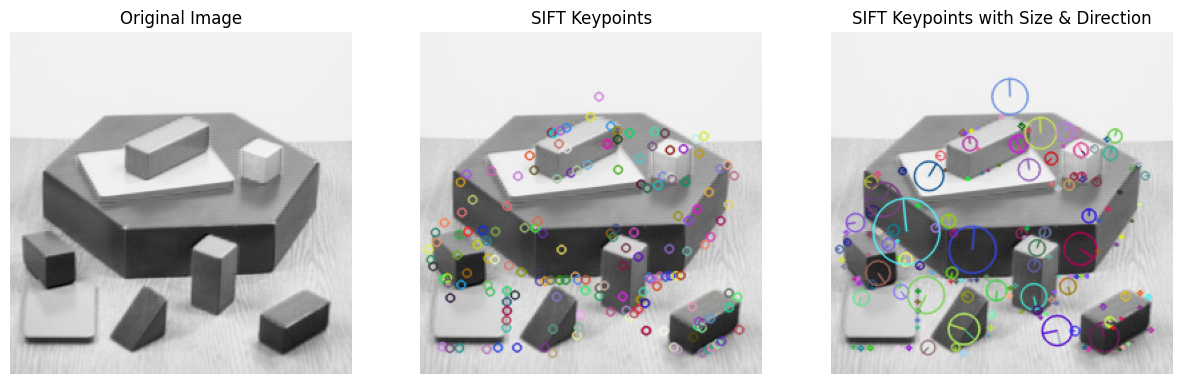

In [22]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read image
img = cv.imread(r"D:\Courses\AI work\NTI\Day4\da4.jpeg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv.SIFT_create()

# Detect keypoints and descriptors
kp, des = sift.detectAndCompute(gray, None)

# Draw keypoints (default, just points)
img1 = cv.drawKeypoints(gray, kp, None)

# Draw keypoints with size & orientation
img2 = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for plotting
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Plot results
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img1_rgb)
plt.title("SIFT Keypoints")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img2_rgb)
plt.title("SIFT Keypoints with Size & Direction")
plt.axis("off")

plt.show()


In [25]:
import cv2

img = cv.imread(r"D:\Courses\AI work\NTI\Day4\da4.jpeg",0)
# Imtiate STAR detector
fast = cv2. FastFeatureDetector_create()
# find the keypoints with STAR
kp = fast.detect(img,None)
# Initiate BRIEF extractor
brief =cv2.xfeatures2d.BriefDescriptorExtractor_create()
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

img2=cv2.drawKeypoints(img,kp,None)
cv2.imshow('brief',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

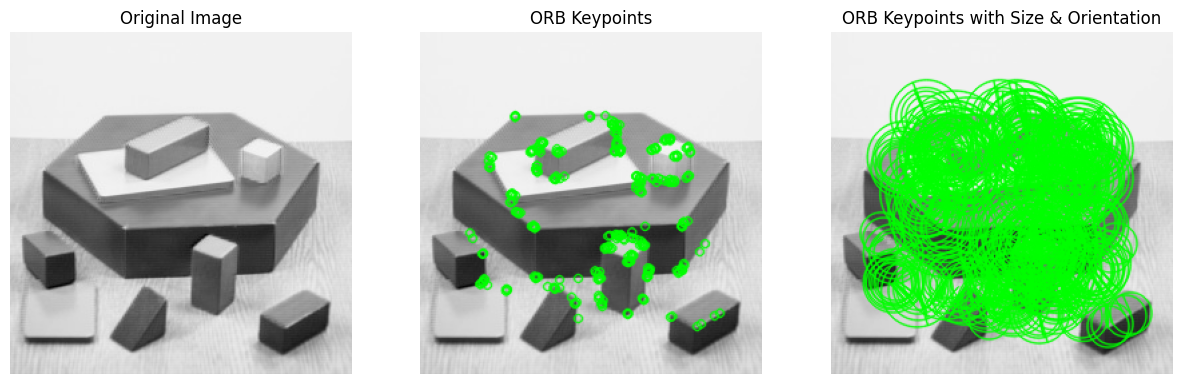

Number of keypoints detected: 307
Descriptor shape: (307, 32)


In [26]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read image
img = cv.imread(r"D:\Courses\AI work\NTI\Day4\da4.jpeg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create ORB detector
orb = cv.ORB_create(nfeatures=500)   # you can adjust number of keypoints

# Detect keypoints and compute descriptors
kp, des = orb.detectAndCompute(gray, None)

# Draw keypoints
img1 = cv.drawKeypoints(gray, kp, None, color=(0,255,0), flags=0)
img2 = cv.drawKeypoints(gray, kp, None, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR → RGB for matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2_rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Show results
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img1_rgb)
plt.title("ORB Keypoints")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img2_rgb)
plt.title("ORB Keypoints with Size & Orientation")
plt.axis("off")

plt.show()

# Print info
print("Number of keypoints detected:", len(kp))
print("Descriptor shape:", des.shape)  # Each ORB descriptor = 32-length binary vector
